In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%%matplotlib inline



UsageError: Line magic function `%%matplotlib` not found.


## Variables in order:
 CRIM     per capita crime rate by town

 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.

 INDUS    proportion of non-retail business acres per town

 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 NOX      nitric oxides concentration (parts per 10 million)

 RM       average number of rooms per dwelling

 AGE      proportion of owner-occupied units built prior to 1940

 DIS      weighted distances to five Boston employment centres

 RAD      index of accessibility to radial highways

 TAX      full-value property-tax rate per $10,000

 PTRATIO  pupil-teacher ratio by town

 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

 LSTAT    % lower status of the population
 
 MEDV     Median value of owner-occupied homes in $1000's

In [58]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
data = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
target = boston.values[1::2, 2]


In [66]:
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
features_df = pd.DataFrame(data, columns=feature_names)
target_col = pd.DataFrame(target, columns=["PRICE"])

boston_df = pd.concat([features_df,target_col], axis = 1)

In [67]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [68]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [69]:
##Checking if any nas in dataset
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [70]:
## EDA
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'PRICE')

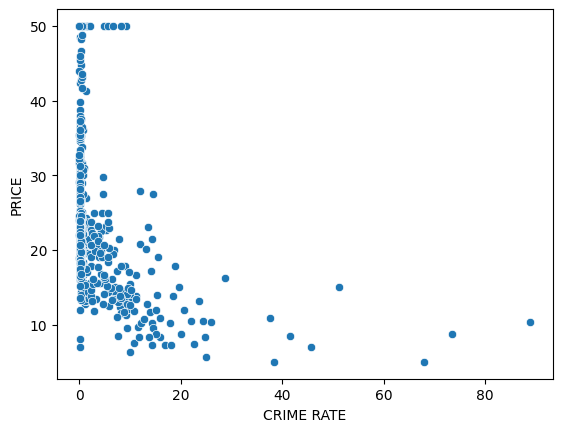

In [80]:
sns.scatterplot(x = boston_df['CRIM'], y = boston_df['PRICE'])
plt.xlabel("CRIME RATE")
plt.ylabel("PRICE")

Text(0, 0.5, 'PRICE')

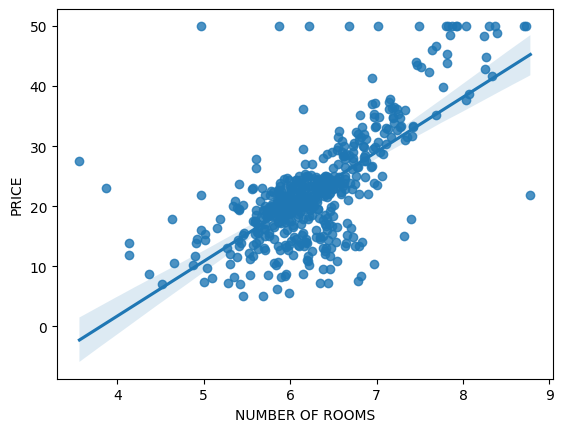

In [79]:
sns.regplot(x = boston_df['RM'], y = boston_df['PRICE'])
plt.xlabel("NUMBER OF ROOMS")
plt.ylabel("PRICE")

Text(0, 0.5, 'PRICE')

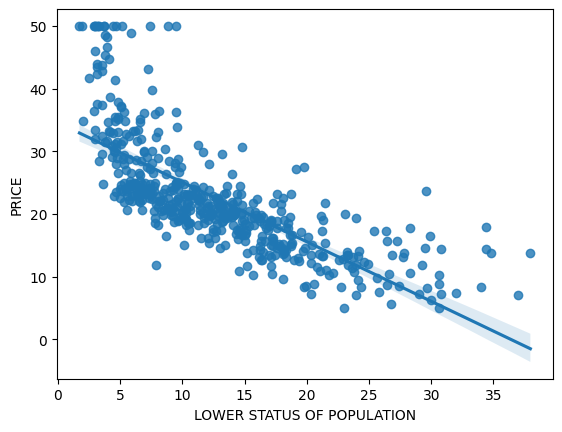

In [84]:
sns.regplot(x = boston_df['LSTAT'], y = boston_df['PRICE'])
plt.xlabel("LOWER STATUS OF POPULATION")
plt.ylabel("PRICE")

In [87]:
#Divide dependent and independent features
X = boston_df.iloc[:,:-1]
Y = boston_df.iloc[:,-1]


In [92]:
##Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, train_size=0.7, random_state=42)

In [95]:
## Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X=x_train)
X_test = scaler.transform(X=x_test)

In [96]:
## Linear Regression

from sklearn.linear_model import LinearRegression

regression = LinearRegression()

regression.fit(X=X_train, y= y_train)

LinearRegression()

In [97]:
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [98]:
print(regression.intercept_)

23.01581920903955


In [99]:
#On which parameters model is trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [101]:
reg_predict = regression.predict(X=X_test)

/Users/vishalsharma/Downloads/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vishalsharma/Downloads/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/vishalsharma/Downloads/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


Text(0, 0.5, 'Prection')

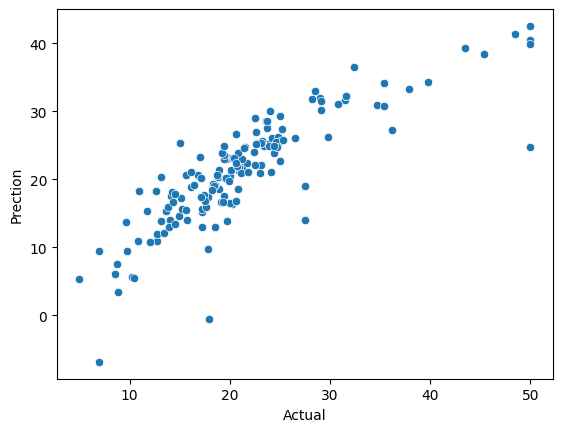

In [109]:
sns.scatterplot(y= reg_predict, x= y_test)
plt.xlabel("Actual")
plt.ylabel("Prection")


Text(13.819444444444445, 0.5, 'Frequency')

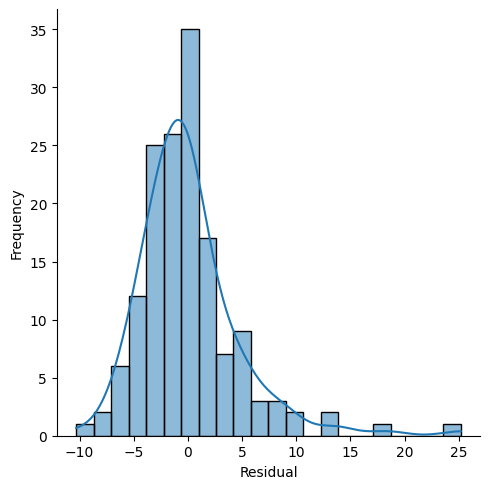

In [107]:
##Prediction with residual

residual = y_test - reg_predict
sns.displot(residual, kde=True)
plt.xlabel("Residual")
plt.ylabel("Frequency")

In [ ]:
#Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_true=y_test, y_pred=reg_predict)
mae = mean_absolute_error(y_true=y_test, y_pred=reg_predict)
r2 = r2_score(y_true=y_test, y_pred=reg_predict)

print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nR2 Score: {r2}")

Mean Squared Error: 21.51744423117721
Mean Absolute Error: 3.1627098714574053
R2 Score: 0.7112260057484932


In [131]:
##Pickling the model
import pickle
pickle.dump(regression, open("boston_housing_model.pkl", "wb"))
pickled_model = pickle.load(open("boston_housing_model.pkl", "rb"))

In [140]:
pickled_model.predict(scaler.transform(data[0].reshape(1, -1)))

/Users/vishalsharma/Downloads/Machine Learning/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])